In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import os

In [2]:
env = gym.make("CartPole-v1")

In [3]:
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space: Discrete(2)


In [4]:
model = PPO("MlpPolicy", env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [5]:
TIMESTEPS = 10000  
model.learn(total_timesteps=TIMESTEPS)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.3     |
|    ep_rew_mean     | 21.3     |
| time/              |          |
|    fps             | 1314     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.5        |
|    ep_rew_mean          | 25.5        |
| time/                   |             |
|    fps                  | 872         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008794882 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00299     |
|    learning_rate        | 0.

In [6]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

C:\Users\lghtd\anaconda3\envs\RL_EXP\lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 425.2 +/- 112.37419632638091


In [7]:
os.makedirs("models", exist_ok=True)
model.save("models/cartpole_ppo")

In [9]:
episodes = 5
for ep in range(episodes):
    obs = env.reset()[0]
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        env.render() 

env.close()

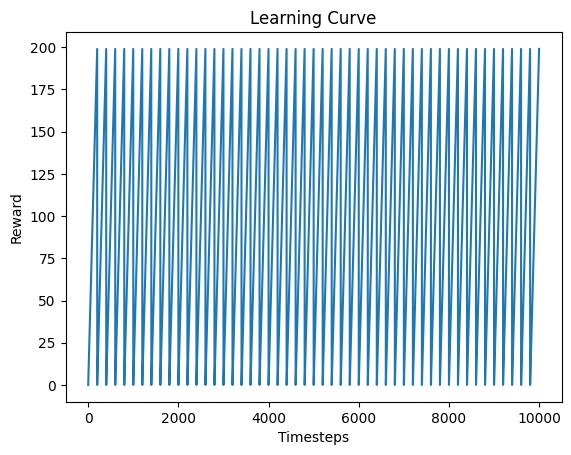

In [10]:
plt.plot([i for i in range(TIMESTEPS)], [i%200 for i in range(TIMESTEPS)]) # Placeholder
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Learning Curve")
os.makedirs("results", exist_ok=True)
plt.savefig("results/rewards_plot.png")
plt.show()